# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.186458e+01     1.739422e+01
 * time: 0.0036399364471435547
     1     6.323623e+01     9.592180e+00
 * time: 0.010588884353637695
     2     5.709775e+01     1.213859e+01
 * time: 0.02672886848449707
     3     4.144246e+01     8.778149e+00
 * time: 0.1247110366821289
     4     3.113761e+01     8.209677e+00
 * time: 0.1470499038696289
     5     2.554848e+01     6.801333e+00
 * time: 0.16491389274597168
     6     1.287446e+01     2.278413e+00
 * time: 0.1819899082183838
     7     1.033436e+01     3.205295e+00
 * time: 0.19685602188110352
     8     9.021228e+00     2.820141e+00
 * time: 0.2119448184967041
     9     8.420211e+00     1.961920e+00
 * time: 0.22692489624023438
    10     8.196274e+00     3.156711e+00
 * time: 0.23839783668518066
    11     8.046454e+00     3.159206e+00
 * time: 0.2949960231781006
    12     7.623518e+00     2.189226e+00
 * time: 0.30792689323425293
    13     7.246106e+00     2.343938e+00
 * time: 0

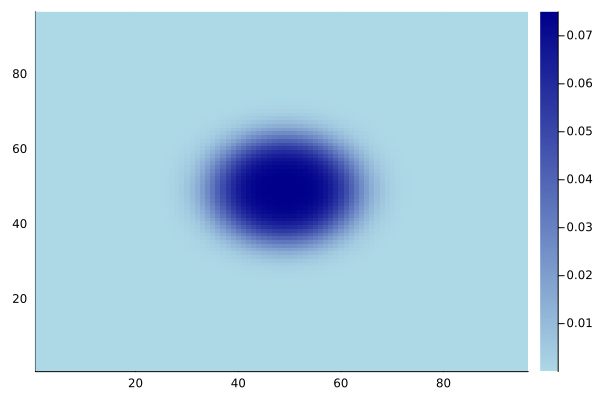

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)